# Bike Sharing Assignment

## Problem statement:
A bike-sharing system is a service that makes bikes available to people for short-term, shared use that can be paid for or provided for free. Many bike share programs enable users to pick up a bike from a "dock" that is typically computer-controlled, where they enter their payment information and the system unlocks the bike. Then, you can return this bike to a different system-affiliated dock.

The ongoing Corona pandemic has recently caused a US bike-sharing company, BoomBikes, to experience significant drops in income. In the current market environment, it is extremely difficult for the organization to remain viable. Therefore, it has chosen to develop a careful business plan so that it may increase its revenue as soon as possible.
    
### Business Goals:

The company wants to know:

- Which variables are significant in predicting the demand for shared bikes.
- How well those variables describe the bike demands


## Steps:

1. Reading and understanding the data
2. EDA
3. Prepare the data for modelling
4. Training the model
5. Residual analysis
6. Predictions and evaluation on the test set

In [1]:
# Importing the packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

import sklearn
from sklearn.model_selection import train_test_split

import statsmodels.api as sm

from sklearn.preprocessing import MinMaxScaler

## Step 1: Reading and Understanding the data

In [2]:
#reading the data

BS_df=pd.read_csv("day.csv")
BS_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [3]:
BS_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [4]:
#Checking for null values:

BS_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [5]:
BS_df.shape

(730, 16)

Note: No missing values found

#### Checking the duplicate values

In [6]:
BS_df_dup = BS_df.copy()

# Checking for duplicates and dropping the entire duplicate row if any
BS_df_dup.drop_duplicates(subset=None, inplace=True)

In [7]:
BS_df_dup.shape

(730, 16)

Note: The shape of the dataset remains the same even after droping the duplicate values, meaning no duplicate found.

### Cleaning the data

In [8]:
#Drop columns that are not useful for analysis

BS_df= BS_df.drop(['instant','casual','registered'], axis=1)

# Removing field dteday as we wont need for analysis
BS_df= BS_df.drop(['dteday'], axis=1)

BS_df


,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600
...,...,...,...,...,...,...,...,...,...,...,...,...
725,1,1,12,0,4,1,2,10.420847,11.33210,65.2917,23.458911,2114
726,1,1,12,0,5,1,2,10.386653,12.75230,59.0000,10.416557,3095
727,1,1,12,0,6,0,2,10.386653,12.12000,75.2917,8.333661,1341
728,1,1,12,0,0,0,1,10.489153,11.58500,48.3333,23.500518,1796


In [9]:
BS_df.season.value_counts()

3    188
2    184
1    180
4    178
Name: season, dtype: int64

In [10]:
BS_df.yr.value_counts()

0    365
1    365
Name: yr, dtype: int64

In [11]:
BS_df.mnth.value_counts()

1     62
3     62
5     62
7     62
8     62
10    62
12    62
4     60
6     60
9     60
11    60
2     56
Name: mnth, dtype: int64

In [12]:
BS_df.holiday.value_counts()

0    709
1     21
Name: holiday, dtype: int64

In [13]:
BS_df.weekday.value_counts()

6    105
0    105
1    105
2    104
4    104
5    104
3    103
Name: weekday, dtype: int64

In [14]:
BS_df.workingday.value_counts()

1    499
0    231
Name: workingday, dtype: int64

In [15]:
BS_df.weathersit.value_counts()

1    463
2    246
3     21
Name: weathersit, dtype: int64

Note:

- Columns like holiday,workingday and yr has binary numbers and doesnt require any changes.
- Columns like Weathersit, weekday,holiday,mnth and season have categorical variables for which we can create dummy variables

## Step 2: EDA

### Visualizing 

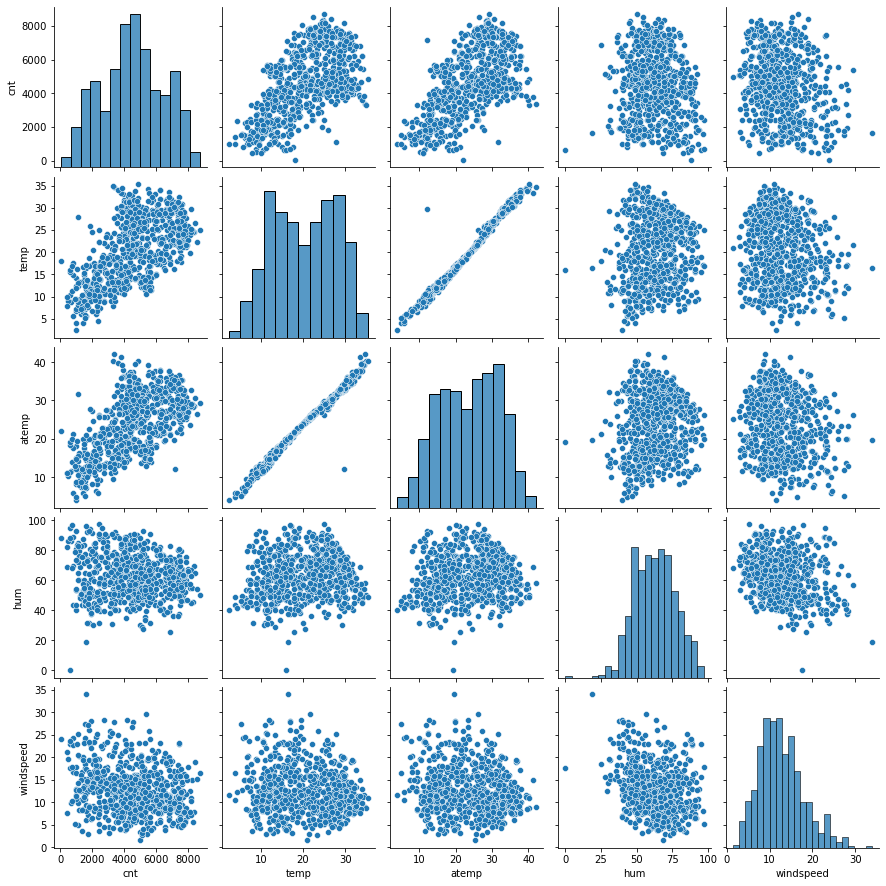

In [16]:
#checking the correlation between the dependent on the independent variables
#dropping the variables which are highly correlated

#Using pairplot for numberical variables

col_names = ['cnt','temp','atemp', 'hum','windspeed']

sns.pairplot(BS_df, vars = col_names)
plt.show()

Note: 

- Could see atemp and temp is highly correlated with cnt forming straight line. 
- Hence droping either of the one column.

In [17]:
# dropping temp since atemp and temp are highly correlated

BS_df=BS_df.drop(['temp'], axis=1)

### Converting to categorical variables

In [18]:
BS_df['weathersit'].replace({1:'Clear' , 2:'Mist' , 3:'Light Rain/Snow' , 4:'Heavy Rain/Snow'} , inplace = True)

BS_df['season'].replace({1:'Spring' , 2:'Summer' , 3:'Fall' , 4:'Winter'} , inplace = True)


BS_df['mnth'].replace({1:'Jan' , 2:'Feb' , 3:'March' , 4:'April' , 5:'May' , 6:'June' ,
                      7:'July' , 8:'Aug' ,9:'Sept' ,10:'Oct' , 11:'Nov' ,12:'Dec'} , inplace = True)

BS_df['weekday'].replace({1:'Mon' , 2:'Tue' , 3:'Wed' , 4:'Thu' , 5:'Fri' , 6:'Sat' ,0:'Sun' } , inplace = True)
BS_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,cnt
0,Spring,0,Jan,0,Sat,0,Mist,18.18125,80.5833,10.749882,985
1,Spring,0,Jan,0,Sun,0,Mist,17.68695,69.6087,16.652113,801
2,Spring,0,Jan,0,Mon,1,Clear,9.47025,43.7273,16.636703,1349
3,Spring,0,Jan,0,Tue,1,Clear,10.60610,59.0435,10.739832,1562
4,Spring,0,Jan,0,Wed,1,Clear,11.46350,43.6957,12.522300,1600


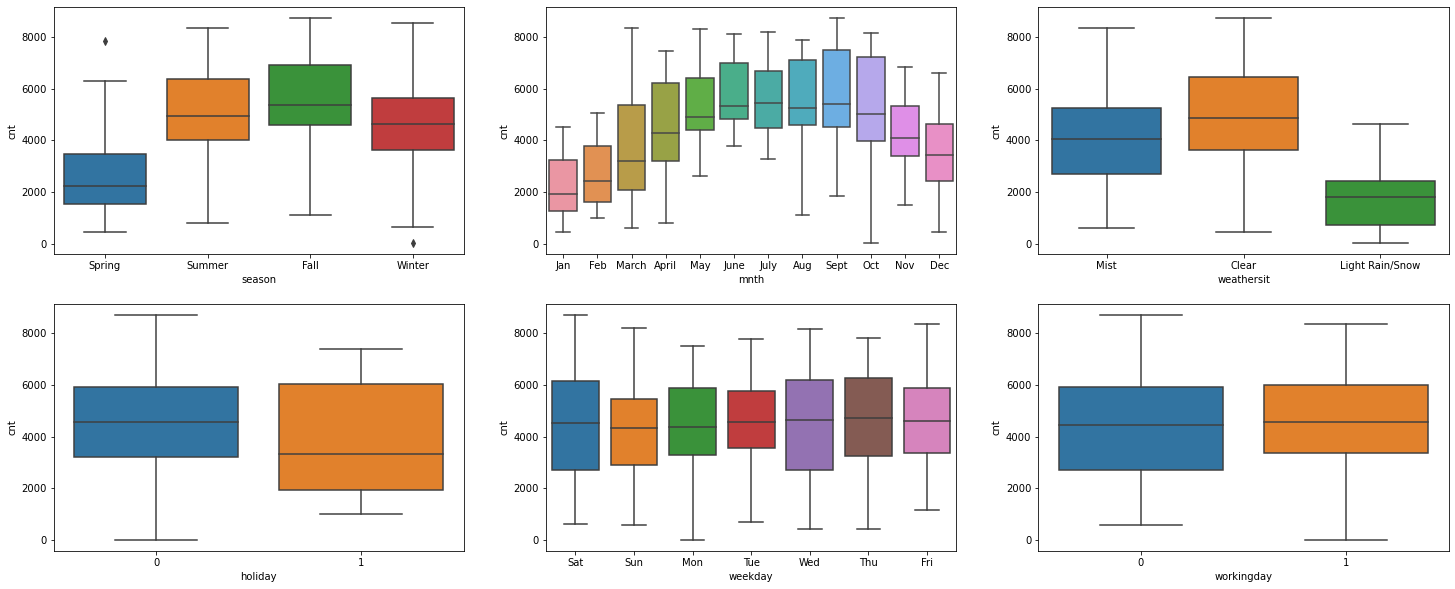

In [19]:
#using boxplot for categorical variables
#Also checking for outliers

plt.figure(figsize=(25, 10))
plt.subplot(2,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = BS_df)
plt.subplot(2,3,2)
sns.boxplot(x = 'mnth', y = 'cnt', data = BS_df)
plt.subplot(2,3,3)
sns.boxplot(x = 'weathersit', y = 'cnt', data = BS_df)
plt.subplot(2,3,4)
sns.boxplot(x = 'holiday', y = 'cnt', data = BS_df)
plt.subplot(2,3,5)
sns.boxplot(x = 'weekday', y = 'cnt', data = BS_df)
plt.subplot(2,3,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = BS_df)
plt.show()

Notes:
- Fall season shows good sales comparing summer and winter 
- Month from april to oct has good sales
- clear Weathersit has good sales
- Holiday doesnt show any significant difference
- Weekday shows similar trend.
- Working day shows good sales. 

- Season, mnth, weathersit, workingday are good predictors of cnt.

## Creating Dummy Variables

In [20]:
BS_df = pd.get_dummies(data=BS_df,columns=["season","mnth","weekday"],drop_first=True)
BS_df = pd.get_dummies(data=BS_df,columns=["weathersit"],drop_first=True)
BS_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 29 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   yr                          730 non-null    int64  
 1   holiday                     730 non-null    int64  
 2   workingday                  730 non-null    int64  
 3   atemp                       730 non-null    float64
 4   hum                         730 non-null    float64
 5   windspeed                   730 non-null    float64
 6   cnt                         730 non-null    int64  
 7   season_Spring               730 non-null    uint8  
 8   season_Summer               730 non-null    uint8  
 9   season_Winter               730 non-null    uint8  
 10  mnth_Aug                    730 non-null    uint8  
 11  mnth_Dec                    730 non-null    uint8  
 12  mnth_Feb                    730 non-null    uint8  
 13  mnth_Jan                    730 non

Note:

- Dropping the first columns as (p-1) dummies can explain p categories.
- In weathersit first column was not dropped so as to not lose the info about severe weather situation.

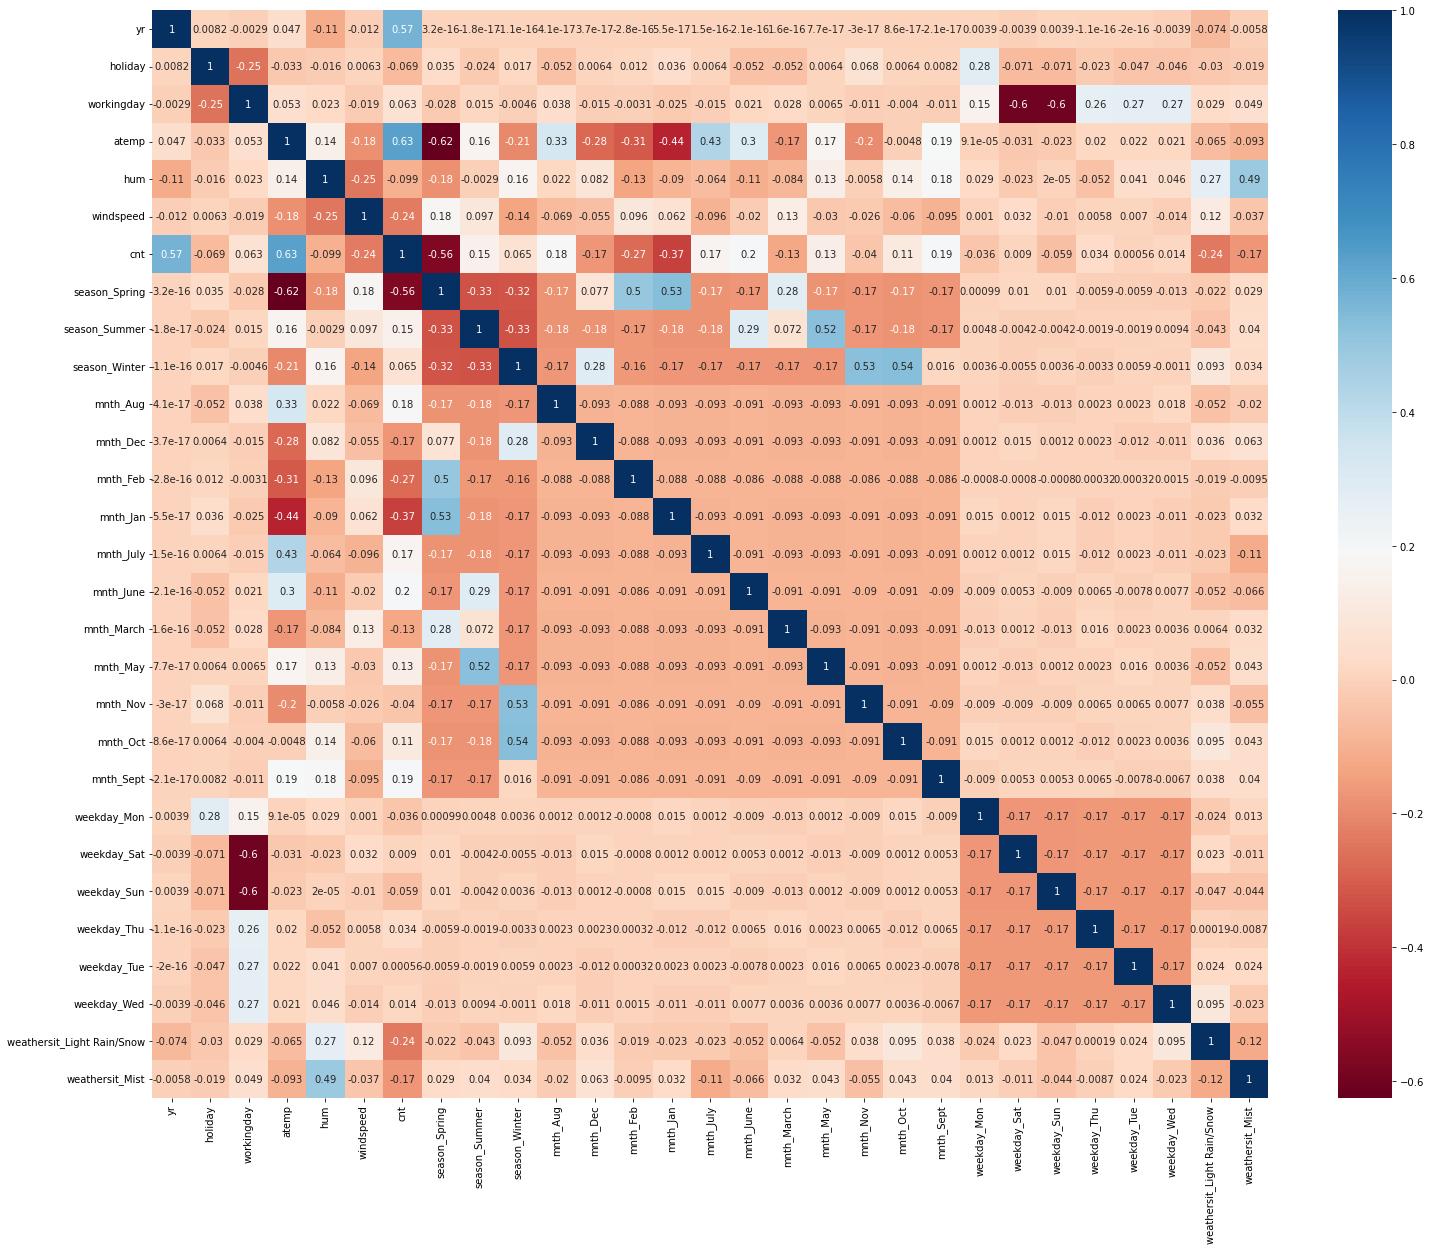

In [21]:
#correlation matrix

plt.figure(figsize = (25,20))
sns.heatmap(BS_df.corr(), annot = True, cmap="RdBu")
plt.show()

Notes:

- The heatmap clearly shows which all variable are multicollinear in nature, and which variable have high collinearity with the target variable.
- We will refer this map back-and-forth while building the linear model so as to validate different correlated values along with VIF & p-value, for identifying the correct variable to select/eliminate from the model

## Step 3: Prepare the data for modelling

In [22]:
# Splitting the data into train and test

from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively

df_train, df_test = train_test_split(BS_df, train_size = 0.7, test_size = 0.3, random_state = 100)

In [23]:
#rescaling the data using MinMax scaler

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

num_vars = ['atemp','hum','windspeed','cnt']

#Fit and transform training set only
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

#Inspect stats fro Training set after scaling
df_train.describe()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,season_Spring,season_Summer,season_Winter,...,mnth_Oct,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Light Rain/Snow,weathersit_Mist
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.512989,0.650369,0.320768,0.513620,0.243137,0.245098,0.24902,...,0.086275,0.080392,0.150980,0.154902,0.143137,0.133333,0.131373,0.158824,0.029412,0.343137
std,0.500429,0.157763,0.468282,0.212385,0.145882,0.169797,0.224593,0.429398,0.430568,0.43287,...,0.281045,0.272166,0.358381,0.362166,0.350557,0.340268,0.338139,0.365870,0.169124,0.475223
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.526811,0.653714,0.296763,0.518638,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [24]:
df_train.head()


,yr,holiday,workingday,atemp,hum,windspeed,cnt,season_Spring,season_Summer,season_Winter,...,mnth_Oct,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Light Rain/Snow,weathersit_Mist
653,1,0,1,0.501133,0.575354,0.300794,0.864243,0,0,1,...,1,0,0,0,0,0,1,0,0,0
576,1,0,1,0.766351,0.725633,0.264686,0.827658,0,0,0,...,0,0,0,0,0,0,1,0,0,0
426,1,0,0,0.438975,0.640189,0.255342,0.465255,1,0,0,...,0,0,0,1,0,0,0,0,0,1
728,1,0,0,0.200348,0.498067,0.663106,0.204096,1,0,0,...,0,0,0,0,1,0,0,0,0,0
482,1,0,0,0.391735,0.504508,0.188475,0.482973,0,1,0,...,0,0,0,1,0,0,0,0,0,1


### divinding into X, y sets

 

In [25]:
y_train = df_train.pop('cnt')  # only cnt is saved here
X_train = df_train 

## Step 4: Training the model

### Build a Model using RFE and Automated approach

In [26]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [27]:
lr= LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [28]:
#Lets take 15 columns as automated 

rfe = RFE(lr,15)
rfe.fit(X_train,y_train)


RFE(estimator=LinearRegression(), n_features_to_select=15)

In [29]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 2),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_Spring', True, 1),
 ('season_Summer', False, 5),
 ('season_Winter', True, 1),
 ('mnth_Aug', False, 6),
 ('mnth_Dec', True, 1),
 ('mnth_Feb', False, 3),
 ('mnth_Jan', True, 1),
 ('mnth_July', True, 1),
 ('mnth_June', False, 7),
 ('mnth_March', False, 14),
 ('mnth_May', False, 4),
 ('mnth_Nov', True, 1),
 ('mnth_Oct', False, 12),
 ('mnth_Sept', True, 1),
 ('weekday_Mon', False, 9),
 ('weekday_Sat', True, 1),
 ('weekday_Sun', False, 8),
 ('weekday_Thu', False, 11),
 ('weekday_Tue', False, 10),
 ('weekday_Wed', False, 13),
 ('weathersit_Light Rain/Snow', True, 1),
 ('weathersit_Mist', True, 1)]

### Building model using statsmodel, for the detailed statistics

#### Function to perform P-value and VIF calculation

considering the below points while dropping columns:

- High P-value, High VIF - We can remove with no second thought
- High-low
- High P-value, Low VIF - Remove first
- High VIF, Low P-value - Remove these after above scenario
- Low P-value, Low VIF

In [30]:
def build_model(cols):
    X_train_sm = sm.add_constant(X_train[cols])
    lm = sm.OLS(y_train, X_train_sm).fit()
    print(lm.summary())
    return lm

In [36]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def get_vif(cols):
    df = X_train[cols]
    vif = pd.DataFrame()
    vif['Features'] = df.columns
    vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif['VIF'] = round(vif['VIF'],2)
    print(vif.sort_values(by='VIF',ascending=False))

In [37]:
X_train.columns[rfe.support_]

Index(['yr', 'holiday', 'atemp', 'hum', 'windspeed', 'season_Spring',
       'season_Winter', 'mnth_Dec', 'mnth_Jan', 'mnth_July', 'mnth_Nov',
       'mnth_Sept', 'weekday_Sat', 'weathersit_Light Rain/Snow',
       'weathersit_Mist'],
      dtype='object')

In [38]:
X_train.columns[~rfe.support_]

Index(['workingday', 'season_Summer', 'mnth_Aug', 'mnth_Feb', 'mnth_June',
       'mnth_March', 'mnth_May', 'mnth_Oct', 'weekday_Mon', 'weekday_Sun',
       'weekday_Thu', 'weekday_Tue', 'weekday_Wed'],
      dtype='object')

In [39]:
X_train_rfe = X_train[['yr', 'holiday', 'atemp', 'hum', 'windspeed', 'season_Spring',
       'season_Winter', 'mnth_Dec', 'mnth_Jan', 'mnth_July', 'mnth_Nov',
       'mnth_Sept', 'weekday_Sat', 'weathersit_Light Rain/Snow',
       'weathersit_Mist']]

## Model 1

In [40]:
cols = ['yr', 'holiday', 'atemp', 'hum', 'windspeed', 'season_Spring',
       'season_Winter', 'mnth_Dec', 'mnth_Jan', 'mnth_July', 'mnth_Nov',
       'mnth_Sept', 'weekday_Sat', 'weathersit_Light Rain/Snow',
       'weathersit_Mist']

build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     175.4
Date:                Tue, 10 May 2022   Prob (F-statistic):          9.67e-187
Time:                        20:22:24   Log-Likelihood:                 508.84
No. Observations:                 510   AIC:                            -985.7
Df Residuals:                     494   BIC:                            -917.9
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

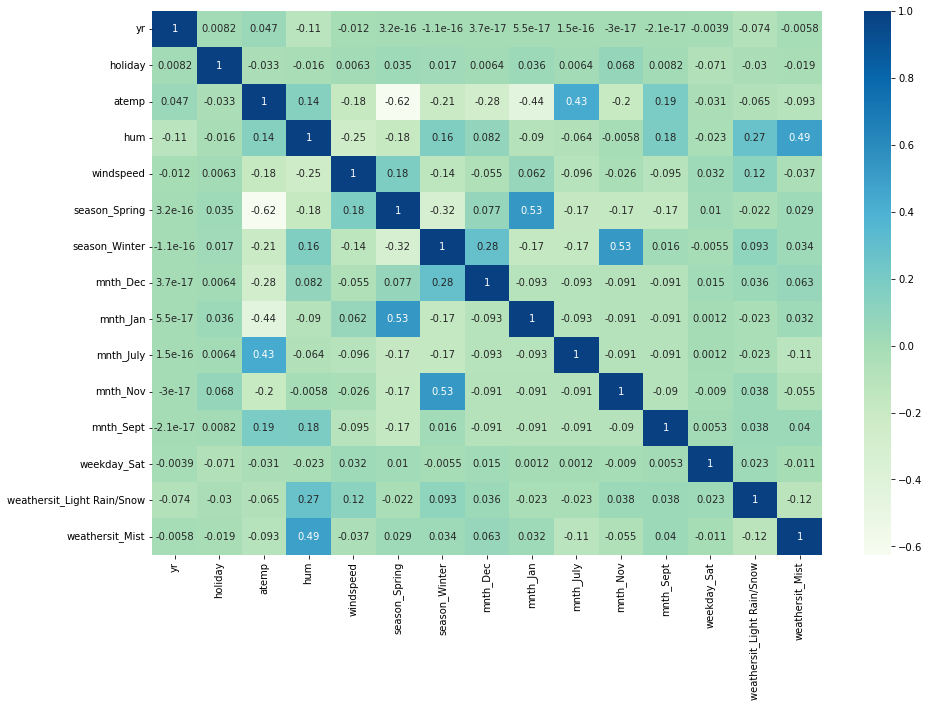

In [41]:
plt.figure(figsize = (15,10))
sns.heatmap(BS_df[['yr', 'holiday', 'atemp', 'hum', 'windspeed', 'season_Spring',
       'season_Winter', 'mnth_Dec', 'mnth_Jan', 'mnth_July', 'mnth_Nov',
       'mnth_Sept', 'weekday_Sat', 'weathersit_Light Rain/Snow',
       'weathersit_Mist']].corr(), cmap='GnBu', annot=True)
plt.show()

Note:
    
- Hum is highly correlated with other independant variables hence droping it

## Model 2

In [42]:
#dropping hum
cols = ['yr', 'holiday', 'atemp', 'windspeed', 'season_Spring',
       'season_Winter', 'mnth_Dec', 'mnth_Jan', 'mnth_July', 'mnth_Nov',
       'mnth_Sept', 'weekday_Sat', 'weathersit_Light Rain/Snow',
       'weathersit_Mist']

build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     181.7
Date:                Tue, 10 May 2022   Prob (F-statistic):          1.10e-184
Time:                        20:22:37   Log-Likelihood:                 501.21
No. Observations:                 510   AIC:                            -972.4
Df Residuals:                     495   BIC:                            -908.9
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

Note: 
- The p value for weekday_sat is > .05. Hence dropping the same

## Model 3

In [43]:
#dropping weekday_sat as it has the pvalue > 0.5, which is statistically insignificant 

cols = ['yr', 'holiday', 'atemp', 'windspeed', 'season_Spring',
       'season_Winter', 'mnth_Dec', 'mnth_Jan', 'mnth_July', 'mnth_Nov',
       'mnth_Sept', 'weathersit_Light Rain/Snow',
       'weathersit_Mist']

build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     194.5
Date:                Tue, 10 May 2022   Prob (F-statistic):          3.95e-185
Time:                        20:22:43   Log-Likelihood:                 499.52
No. Observations:                 510   AIC:                            -971.0
Df Residuals:                     496   BIC:                            -911.8
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

Note:

- Could see that all the p-values are <.05
- The VIF is less than 5
- r2 and adj.r2 values are 83%

Hence concluding the model 3 as the best fit model and testing in testdata


In [45]:
#Build a model with all columns to select features automatically
def build_model_sk(X,y):
    lr1 = LinearRegression()
    lr1.fit(X,y)
    return lr1

In [64]:
#Let us build the finalmodel using sklearn
cols = ['yr', 'holiday', 'atemp', 'windspeed', 'season_Spring',
       'season_Winter', 'mnth_Dec', 'mnth_Jan', 'mnth_July', 'mnth_Nov',
       'mnth_Sept', 'weathersit_Light Rain/Snow',
       'weathersit_Mist']

#Build a model with above columns
lr = build_model_sk(X_train[cols],y_train)
print(lr.intercept_,lr.coef_)

0.2930994308517345 [ 0.23572664 -0.08808292  0.41172139 -0.14183468 -0.10960411  0.05804659
 -0.0531017  -0.05621873 -0.0597654  -0.05006376  0.05568648 -0.29118024
 -0.08174722]


In [89]:
X_train[cols]

,yr,holiday,atemp,windspeed,season_Spring,season_Winter,mnth_Dec,mnth_Jan,mnth_July,mnth_Nov,mnth_Sept,weathersit_Light Rain/Snow,weathersit_Mist
653,1,0,0.501133,0.300794,0,1,0,0,0,0,0,0,0
576,1,0,0.766351,0.264686,0,0,0,0,1,0,0,0,0
426,1,0,0.438975,0.255342,1,0,0,0,0,0,0,0,1
728,1,0,0.200348,0.663106,1,0,1,0,0,0,0,0,0
482,1,0,0.391735,0.188475,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
526,1,0,0.762183,0.355596,0,0,0,0,0,0,0,0,1
578,1,0,0.824359,0.187140,0,0,0,0,0,0,0,0,0
53,0,0,0.218747,0.111379,1,0,0,0,0,0,0,0,0
350,0,0,0.223544,0.431816,0,1,1,0,0,0,0,0,1


## Step 5: Residual analysis

In [65]:
y_train_pred = lr.predict(X_train[cols])

In [48]:
cols

['yr',
 'holiday',
 'atemp',
 'windspeed',
 'season_Spring',
 'season_Winter',
 'mnth_Dec',
 'mnth_Jan',
 'mnth_July',
 'mnth_Nov',
 'mnth_Sept',
 'weathersit_Light Rain/Snow',
 'weathersit_Mist']

Text(0.5, 0, 'Errors')

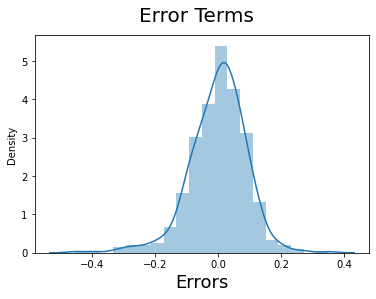

In [49]:
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)   

Note:
    
- Residuals are normally distributed 

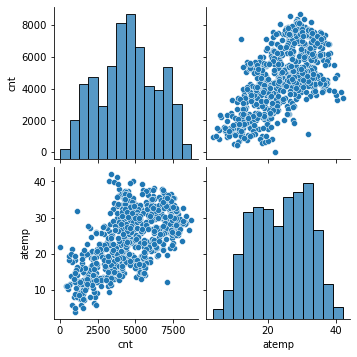

In [50]:
cols_1 = ['cnt','atemp']

sns.pairplot(BS_df, vars = cols_1)
plt.show()

Note:
- No multicolinearity between dependent and independent variable

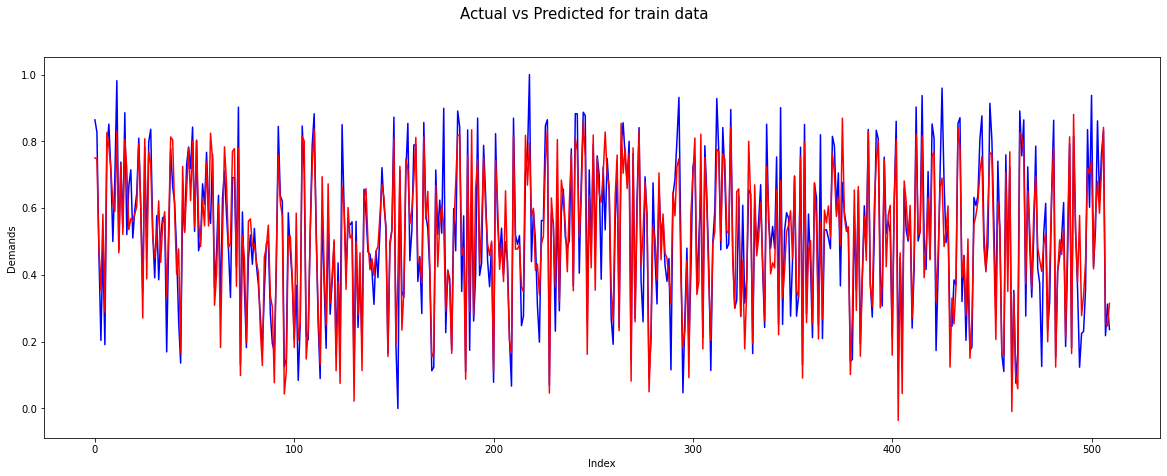

In [95]:
# Actual vs Predicted
c = [i for i in range(0,len(X_train),1)]
plt.figure(figsize=(20,7))
plt.plot(c,y_train, color="blue")
plt.plot(c,y_train_pred, color="red")
plt.suptitle('Actual vs Predicted for train data', fontsize = 15)
plt.xlabel('Index')
plt.ylabel('Demands')
plt.show()

Note:
    
- Actual and Predicted result following almost the same pattern so this model seems ok

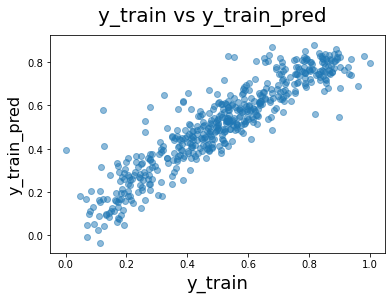

In [101]:
#checking the linearity
fig = plt.figure()
plt.scatter(y_train, y_train_pred, alpha=.5)
fig.suptitle('y_train vs y_train_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_train', fontsize = 18)                          # X-label
plt.ylabel('y_train_pred', fontsize = 16) 
plt.show()

In [51]:
get_vif(cols)

                      Features   VIF
2                        atemp  4.57
3                    windspeed  3.95
5                season_Winter  2.55
4                season_Spring  2.35
0                           yr  2.06
9                     mnth_Nov  1.80
7                     mnth_Jan  1.65
12             weathersit_Mist  1.53
6                     mnth_Dec  1.46
8                    mnth_July  1.35
10                   mnth_Sept  1.21
11  weathersit_Light Rain/Snow  1.09
1                      holiday  1.06


Note:

- All values are less than 5

## Step 6: Evaluating the train data on the  test data

In [52]:


num_vars = ['atemp','hum','windspeed','cnt']

#Fit and transform training set only
df_test[num_vars] = scaler.transform(df_test[num_vars])

#Inspect stats fro Training set after scaling
df_test.describe()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,season_Spring,season_Summer,season_Winter,...,mnth_Oct,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Light Rain/Snow,weathersit_Mist
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.479452,0.036530,0.698630,0.532991,0.638508,0.313350,0.520592,0.255708,0.264840,0.232877,...,0.082192,0.086758,0.127854,0.118721,0.146119,0.164384,0.164384,0.100457,0.027397,0.319635
std,0.500722,0.188034,0.459904,0.217888,0.148974,0.159947,0.218435,0.437258,0.442259,0.423633,...,0.275286,0.282125,0.334692,0.324202,0.354034,0.371472,0.371472,0.301297,0.163612,0.467403
min,0.000000,0.000000,0.000000,0.025950,0.261915,-0.042808,0.048205,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.344751,0.527265,0.198517,0.377531,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.549198,0.627737,0.299459,0.524275,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.714132,0.743928,0.403048,0.672745,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,0.980934,1.002146,0.807474,0.963300,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Note: 
 - The columns in the num_vars has transformed successfully.

In [53]:
y_test = df_test.pop('cnt')
X_test = df_test

In [54]:
X_test.columns

Index(['yr', 'holiday', 'workingday', 'atemp', 'hum', 'windspeed',
       'season_Spring', 'season_Summer', 'season_Winter', 'mnth_Aug',
       'mnth_Dec', 'mnth_Feb', 'mnth_Jan', 'mnth_July', 'mnth_June',
       'mnth_March', 'mnth_May', 'mnth_Nov', 'mnth_Oct', 'mnth_Sept',
       'weekday_Mon', 'weekday_Sat', 'weekday_Sun', 'weekday_Thu',
       'weekday_Tue', 'weekday_Wed', 'weathersit_Light Rain/Snow',
       'weathersit_Mist'],
      dtype='object')

In [73]:
X_test=df_test[cols]
X_test.columns


Index(['yr', 'holiday', 'atemp', 'windspeed', 'season_Spring', 'season_Winter',
       'mnth_Dec', 'mnth_Jan', 'mnth_July', 'mnth_Nov', 'mnth_Sept',
       'weathersit_Light Rain/Snow', 'weathersit_Mist'],
      dtype='object')

In [74]:
X_test_new= sm.add_constant(X_test)
X_test_new

,const,yr,holiday,atemp,windspeed,season_Spring,season_Winter,mnth_Dec,mnth_Jan,mnth_July,mnth_Nov,mnth_Sept,weathersit_Light Rain/Snow,weathersit_Mist
184,1.0,0,1,0.769660,0.084219,0,0,0,0,1,0,0,0,1
535,1.0,1,0,0.842587,0.153728,0,0,0,0,0,0,0,0,0
299,1.0,0,0,0.496145,0.334206,0,1,0,0,0,0,0,0,1
221,1.0,0,0,0.795343,0.339570,0,0,0,0,0,0,0,0,0
152,1.0,0,0,0.741471,0.537414,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
400,1.0,1,0,0.243430,0.287411,1,0,0,0,0,0,0,0,1
702,1.0,1,0,0.511907,0.283397,0,1,1,0,0,0,0,0,0
127,1.0,0,0,0.577380,0.069510,0,0,0,0,0,0,0,0,0
640,1.0,1,0,0.682653,0.052115,0,1,0,0,0,0,0,0,1


In [90]:
y_test_pred=lr.predict(X_test)

In [85]:
X_test_new.columns

Index(['const', 'yr', 'holiday', 'atemp', 'windspeed', 'season_Spring',
       'season_Winter', 'mnth_Dec', 'mnth_Jan', 'mnth_July', 'mnth_Nov',
       'mnth_Sept', 'weathersit_Light Rain/Snow', 'weathersit_Mist'],
      dtype='object')

In [82]:
y_test_pred

array([ 0.36844432,  0.85393345,  0.42627034,  0.57239647,  0.52215509,
        0.4718125 ,  0.51812784,  0.47398007,  0.71810834,  0.57242376,
        0.79527864,  0.67362589,  0.49451931,  0.68495353,  0.1527693 ,
        0.81536814,  0.56512522,  0.16681223,  0.59827467,  0.57814738,
        0.82826661,  0.55353404,  0.78565555,  0.09380105,  0.39654523,
        0.52147179,  0.85752098,  0.49531784,  0.82510304,  0.51182687,
        0.78937791,  0.72363284,  0.49806228,  0.66928273,  0.17174858,
        0.51723792,  0.58840192,  0.70223691,  0.10286649,  0.39576168,
        0.45941667,  0.3495782 ,  0.6424703 ,  0.59815824,  0.61250701,
        0.79698788,  0.18767218,  0.56971609,  0.53320174,  0.32551577,
        0.76927049,  0.48367882,  0.57137264,  0.77976729,  0.34761611,
        0.79153799,  0.59140197,  0.58636373,  0.20133324,  0.62856381,
        0.52405032,  0.50065966,  0.23595228,  0.60049613,  0.53885195,
        0.57983969,  0.83816787,  0.60623882,  0.45891597,  0.79

In [88]:
lr

LinearRegression()

Text(0.5, 0, 'Errors')

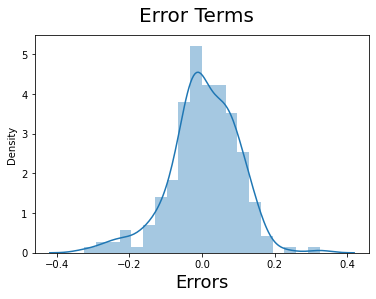

In [83]:
fig = plt.figure()
sns.distplot((y_test - y_test_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)  

In [ ]:
Note: 
    
- Like train data, the residuals are normals distributed

In [98]:
 from sklearn.metrics import r2_score
R2_test=r2_score(y_true=y_test, y_pred=y_test_pred)
R2_train=r2_score(y_true=y_train, y_pred=y_train_pred)
print(R2_train)
print(R2_test)

0.8359991965394293
0.8179669424739716


In [108]:
#adjusted R2 for test
# n is number of rows in X
n = X_test.shape[0]
# Number of features (predictors, p) is the shape along axis 1
p = X_test.shape[1]
adjusted_r2_test = 1-(1-R2_test)*(n-1)/(n-p-1)

n = X_train.shape[0]
p = X_train.shape[1]
adjusted_r2_train = 1-(1-R2_train)*(n-1)/(n-p-1)

print(adjusted_r2_train)
print(adjusted_r2_test)

0.8264523722215583
0.8064233827284186


Note: 
- R2 value for predictions on test data (0.817) is almost same as R2 value of train data(0.836). This is a good R-squared value, hence we can see our model is performing good even on unseen data (test data)
- The adjusted r2 also have good value.

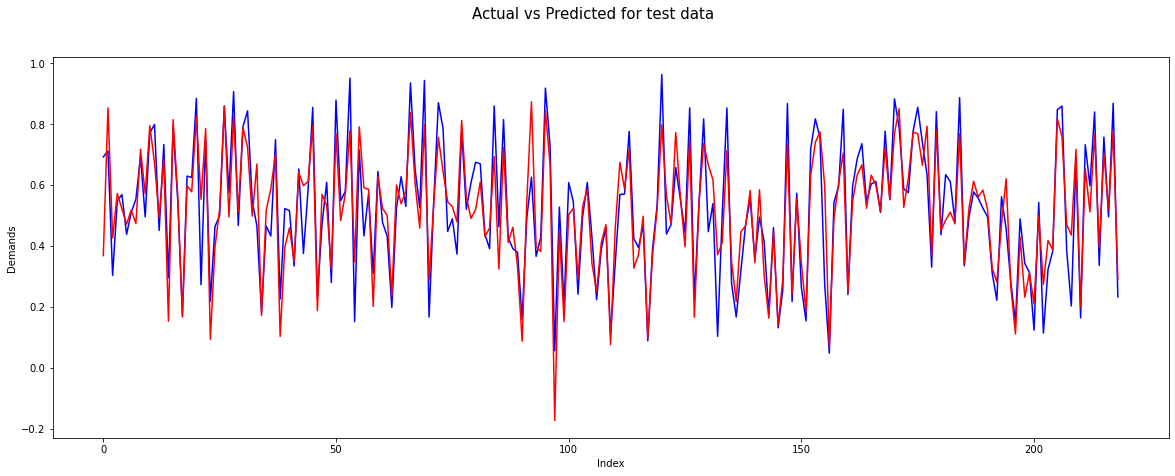

In [99]:
# Actual vs Predicted
c = [i for i in range(0,len(X_test),1)]
plt.figure(figsize=(20,7))
plt.plot(c,y_test, color="blue")
plt.plot(c,y_test_pred, color="red")
plt.suptitle('Actual vs Predicted for test data', fontsize = 15)
plt.xlabel('Index')
plt.ylabel('Demands')
plt.show()

Note:
    
- As we can see predictions for test data is very close to actuals

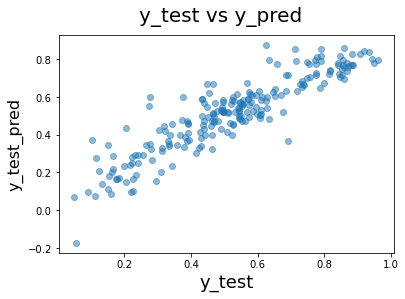

In [100]:
#checking the linearity
fig = plt.figure()
plt.scatter(y_test, y_test_pred, alpha=.5)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_test_pred', fontsize = 16) 
plt.show()

## Conclusion

- There would be less bookings during Light Snow or Rain, they could probably use this time to service the bikes without having business impact.
- Company should focus on expanding business during September.
- Comparing the previous data, the demand increases when the situation is back to normal	
- During spring season, the sales goes down by -0.1096

Hence when the situation comes back to normal, the company should come up with new offers during spring when the weather is pleasant and also advertise a little for September as this is when business would be at its best

#### Significant variables:
    
- atemp
- yr
- season (Winter,Spring)
- mnth (Sept, Nov, Dec, Jan, July)
- holiday
- windspeed
- weathersit (Mist, Light Rain/Snow)
